<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/Copy_of_Graph_Creator_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CROSS VALIDATION STATEGIES**
Cross-validation (CV) is a technique used in machine learning to evaluate the performance of a model by training it on different subsets of the data and testing it on the remaining subsets. This helps to avoid overfitting, which is a common problem in machine learning where a model becomes too specialized to the training data and does not generalize well to new data.

### **Different Approaches to Cross-Validation**

There are several different types of cross-validation, but the most common are:

**K-fold cross-validation**: This is the most widely used type of cross-validation. The data is divided into k equal-sized folds. The model is trained on k-1 folds and tested on the remaining fold. This is repeated k times, and the results are averaged to get an overall measure of the model's performance.

**Leave-p-out cross-validation**: This is a special case of k-fold cross-validation where k is equal to the number of samples in the dataset. The model is trained on all but one sample, and then tested on the remaining sample. This is repeated for each sample in the dataset, and the results are averaged to get an overall measure of the model's performance.

**Repeated cross-validation**: This is a variation of k-fold cross-validation where the data is divided into k folds, but the folds are chosen randomly multiple times. This helps to reduce the variance of the estimates of the model's performance.

**Stratification**: When the data is unbalanced, it can be helpful to stratify the folds. This means that the folds are chosen so that they have the same proportion of each class of data. This helps to ensure that the model is not biased towards any particular class of data.

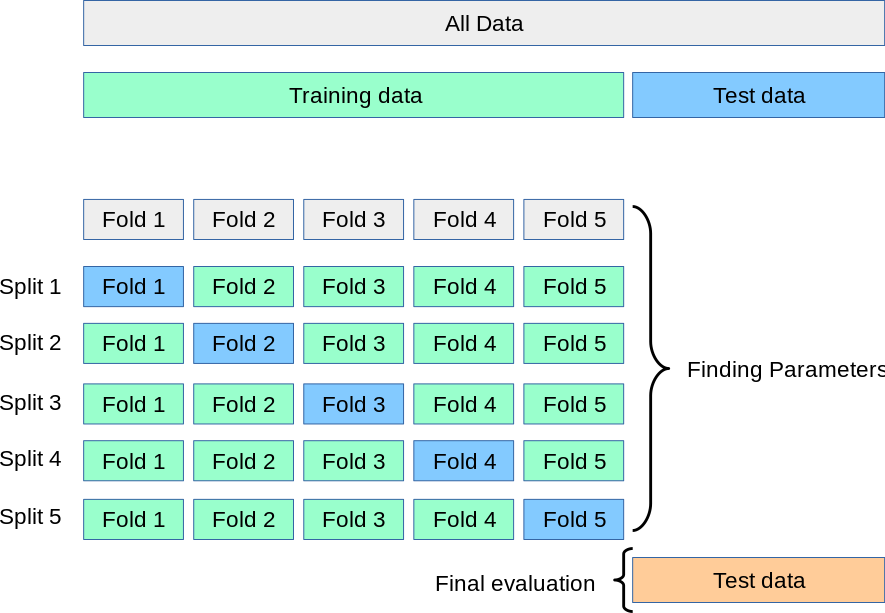

Cross Validation K-Fold:



### **Why CV?**

Cross-validation is a powerful technique for evaluating the performance of machine learning models. It is more reliable than simply splitting the data into a training set and a test set because it allows the model to be tested on a wider variety of data. This helps to ensure that the model is not overfitting to the training data.

Here are some of the advantages of using cross-validation:

* It is a more reliable way to evaluate the performance of a model than simply splitting the data into a training set and a test set.
* It can help to identify and avoid overfitting.
* It can be used to compare different models.
* It can be used to tune the hyperparameters of a model.

Here are some of the disadvantages of using cross-validation:

* It can be computationally expensive, especially for large datasets.

In [38]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

In [10]:
# make a synthetic dataset
X, y = make_circles(factor=0.5, n_samples=1000, random_state=0, noise=0.2)

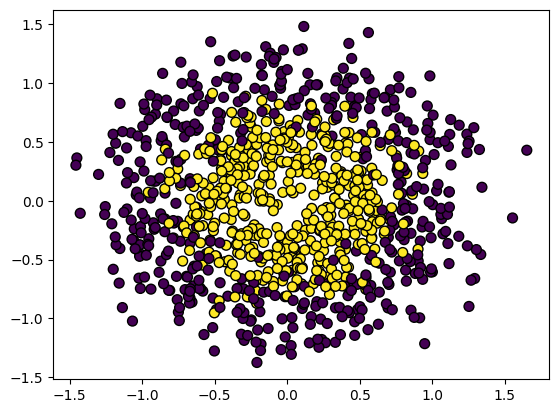

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")

In [23]:
X_t, X_test, y_t, y_test = train_test_split(X,y,test_size=0.3,random_state=1978)

tree = DecisionTreeClassifier()

tree.fit(X_t, y_t)

print(tree.score(X_t, y_t),tree.score(X_test, y_test))

1.0 0.8433333333333334


In [30]:
scores = cross_val_score(tree, X_t, y_t, cv=5, )
print(np.average(scores))

0.8099999999999999


In [36]:
scores = cross_validate(tree, X_t, y_t, cv=5, return_train_score=True)
print("Test Score: {}".format(np.average(scores['test_score'])))
print("Train Score: {}".format(np.average(scores['train_score'])))

Test Score: 0.8157142857142856
Train Score: 1.0


In [45]:
scores

{'fit_time': array([0.00929117, 0.00247622, 0.00230575, 0.00247478, 0.00261521]),
 'score_time': array([0.00211883, 0.00117779, 0.00096822, 0.00098896, 0.0010004 ]),
 'test_score': array([0.85714286, 0.79285714, 0.77857143, 0.80714286, 0.84285714]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [49]:
results = pd.DataFrame(index=["Train","Test"],columns=["Base_Model","Hyperparmeter_Model"]);

results.loc[:,"Base_Model"] = [np.average(scores['train_score']),np.average(scores['test_score'])];

results

<ipython-input-49-2a80edc145a0>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:,"Base_Model"] = [np.average(scores['train_score']),np.average(scores['test_score'])];


,Base_Model,Hyperparmeter_Model
Train,1.000000,NaN
Test,0.815714,NaN


### Cross-Validation-Test Dataset Management in a ML Project:

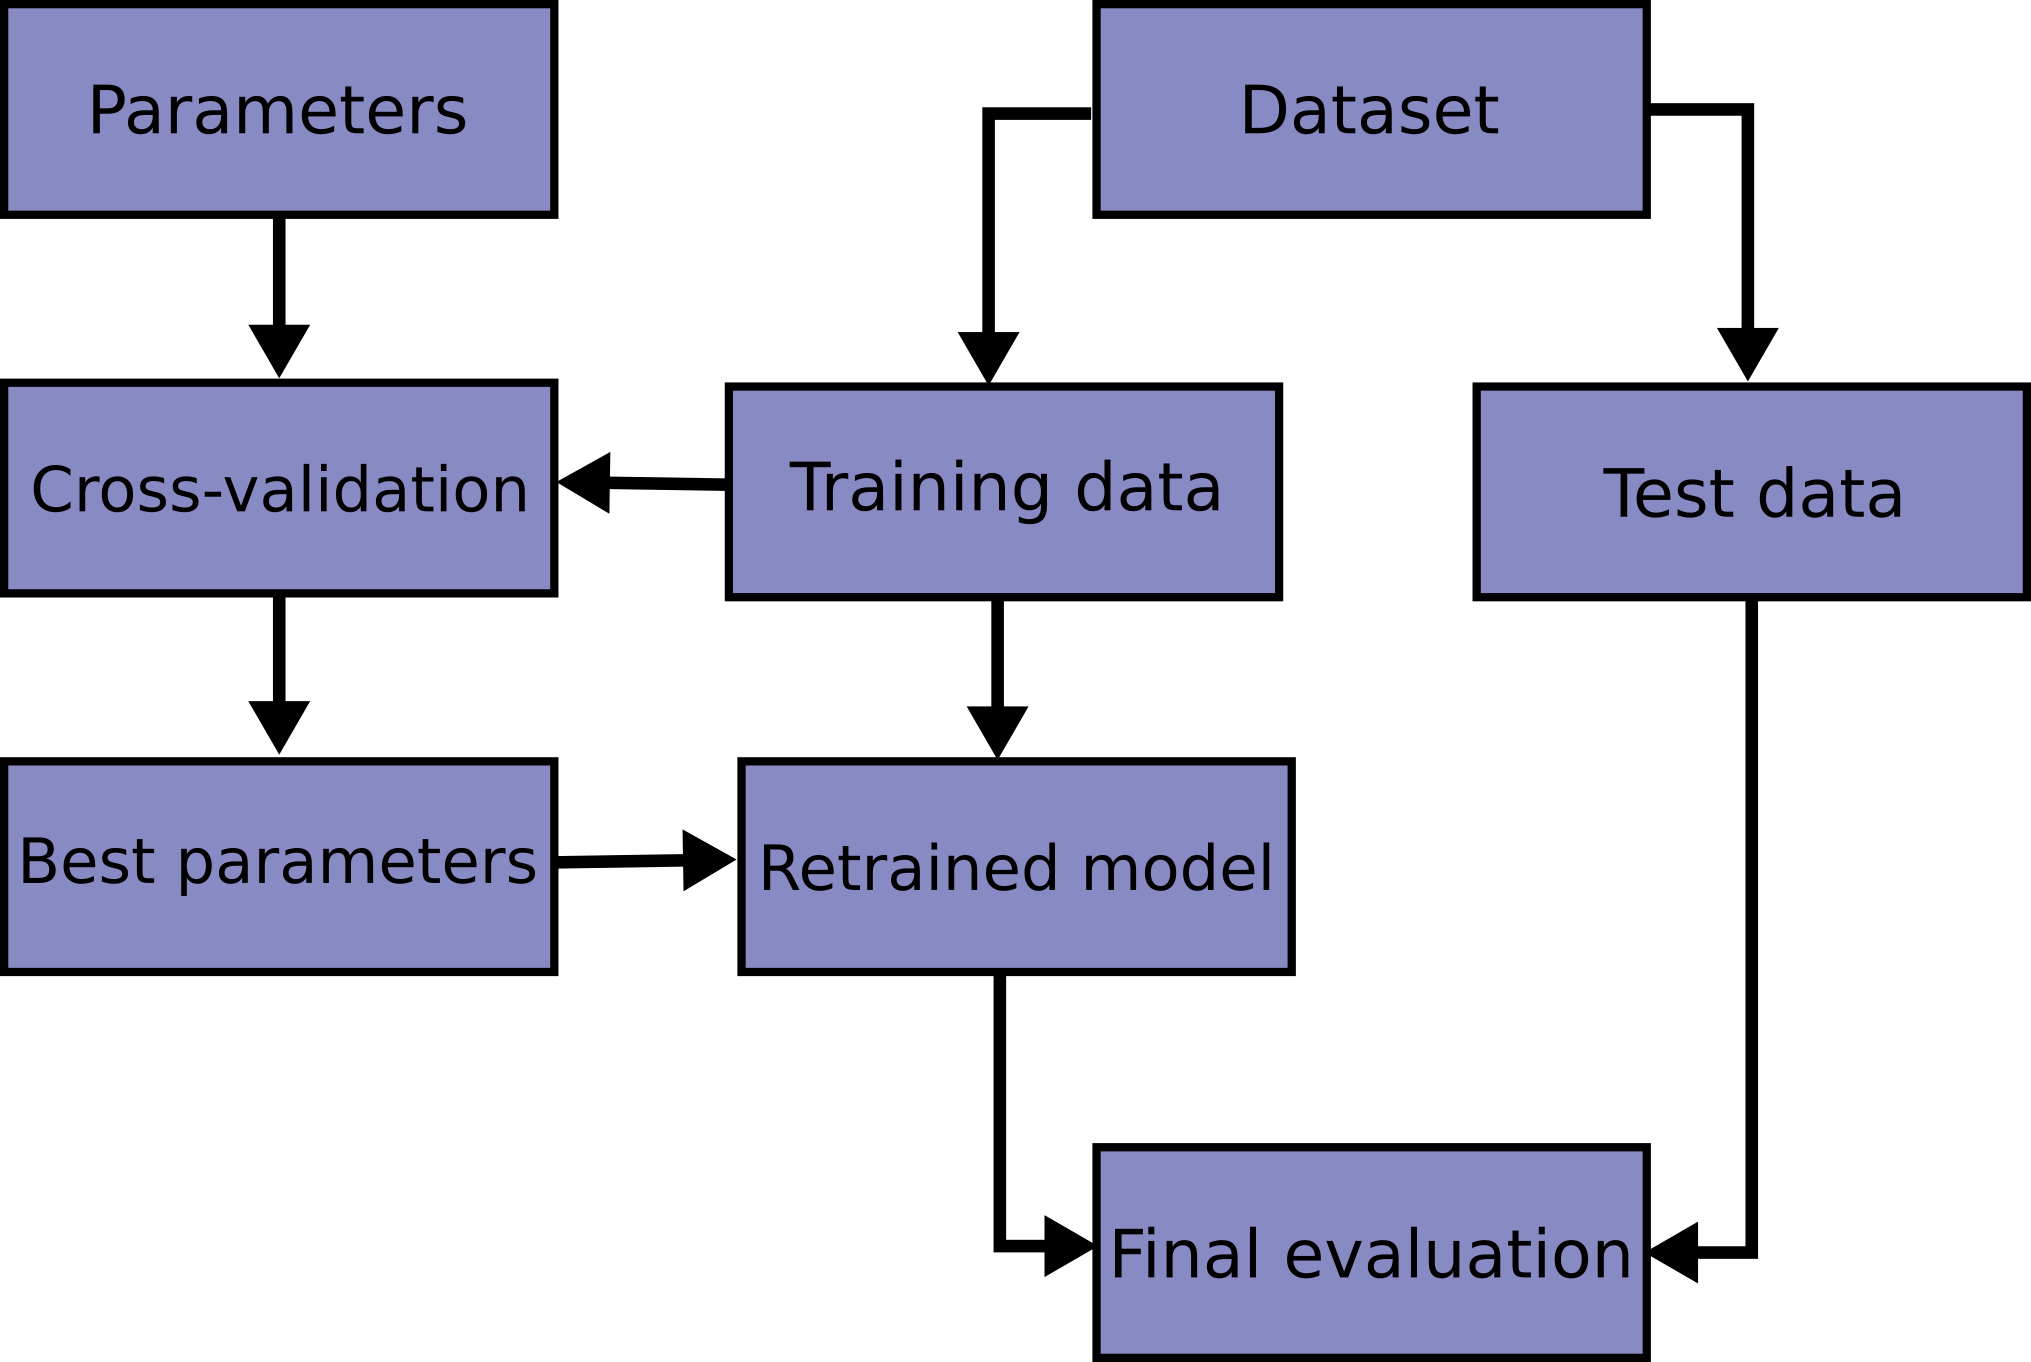



In [39]:
param = {"max_depth":[6,7,8,9,10,11],"min_samples_split":[2,3,4,5,6,7,8],"min_samples_leaf":[1,2,3,4,5,6,7,8]}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, param, scoring="accuracy")

In [42]:
grid.fit(X_t, y_t)

grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [43]:
grid.best_params_, grid.best_score_

({'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6},
 0.8528571428571429)

In [51]:
print(grid.score(X_t, y_t),grid.score(X_test, y_test))

0.9385714285714286 0.8633333333333333


In [50]:
results.loc[:,"Hyperparmeter_Model"] = [grid.score(X_t, y_t),grid.score(X_test, y_test)]
results

<ipython-input-50-523ebe7e50e1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.loc[:,"Hyperparmeter_Model"] = [grid.score(X_t, y_t),grid.score(X_test, y_test)]


,Base_Model,Hyperparmeter_Model
Train,1.000000,0.938571
Test,0.815714,0.863333
